## Dataset 1000_Companies

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('1000_Companies.csv')

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
state = df.pop('State')

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


## Exploratory Data Analysis

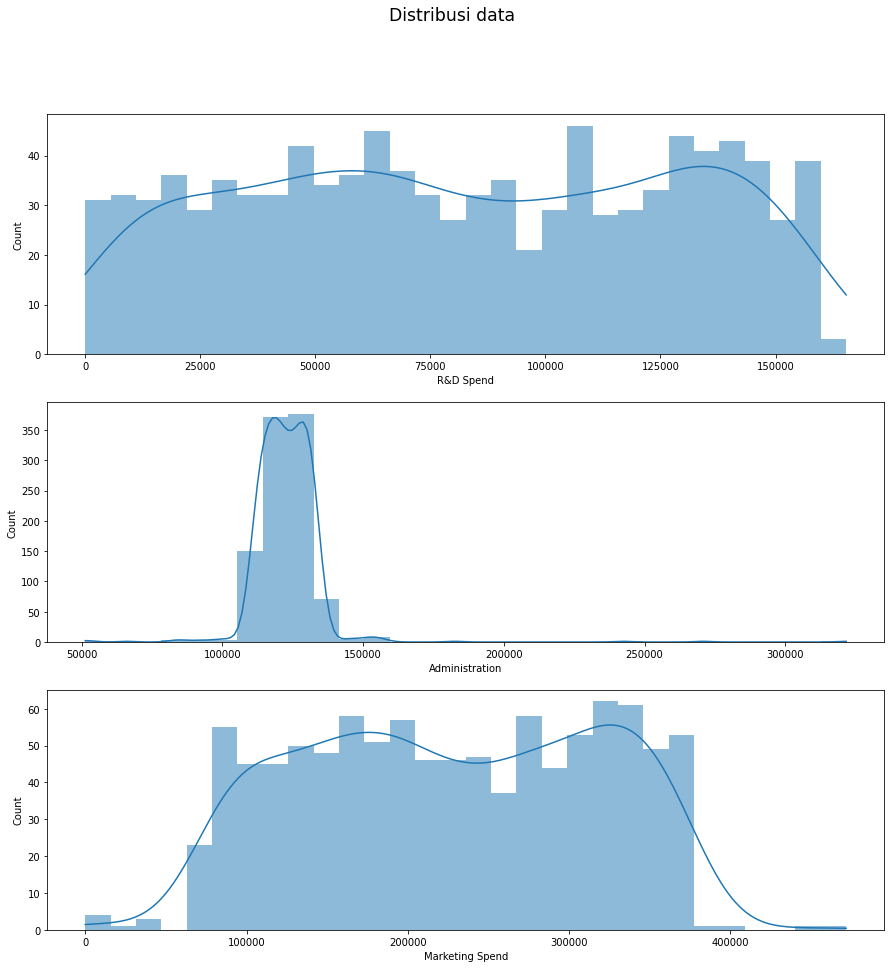

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Distribusi data', fontsize='xx-large')

sns.histplot(df['R&D Spend'], bins=30, ax=axes[0], kde=True, linewidth=0)
axes[0].set_xlabel('R&D Spend')

sns.histplot(df['Administration'], bins=30, ax=axes[1], kde=True, linewidth=0)
axes[1].set_xlabel('Administration')

sns.histplot(df['Marketing Spend'], bins=30, ax=axes[2], kde=True, linewidth=0)
axes[2].set_xlabel('Marketing Spend')

plt.show()

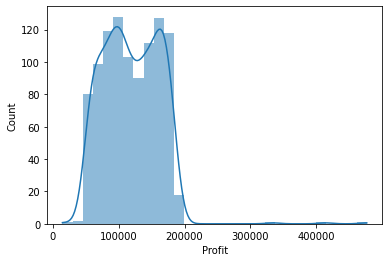

In [ ]:
sns.histplot(df['Profit'], bins=30, kde=True, linewidth=0)
plt.show()

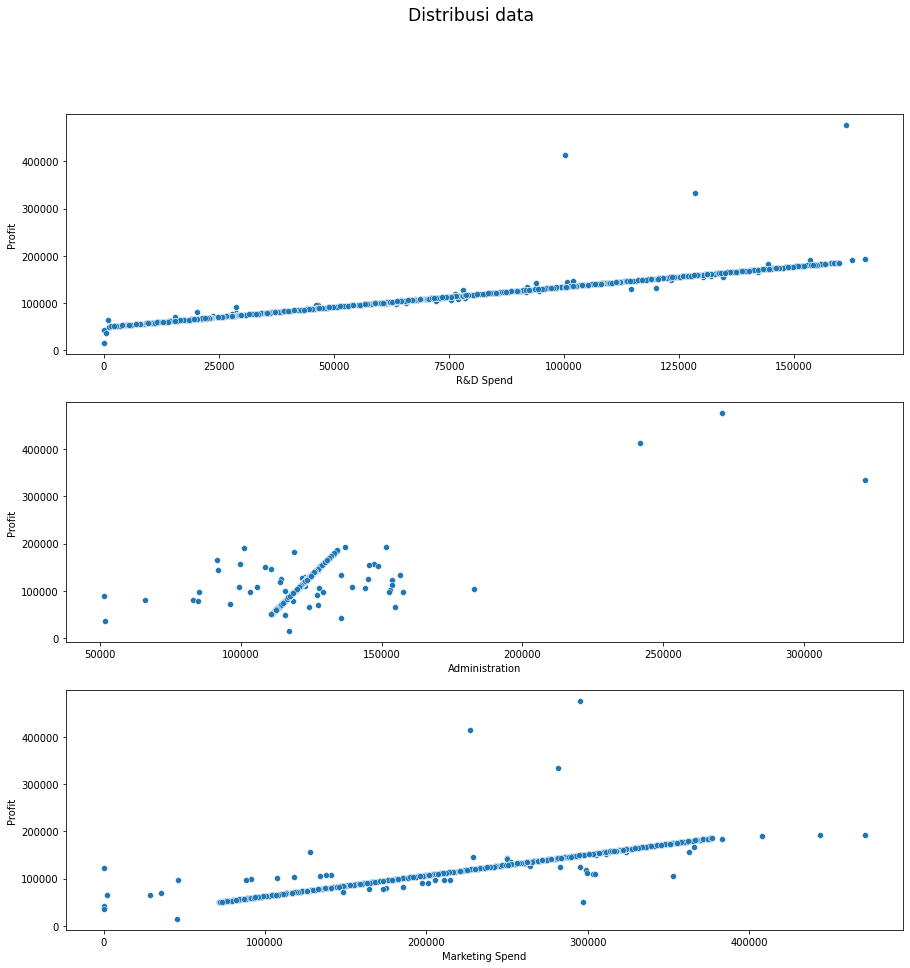

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Distribusi data', fontsize='xx-large')

sns.scatterplot(x=df['R&D Spend'], y=df['Profit'], ax=axes[0])
axes[0].set_xlabel('R&D Spend')

sns.scatterplot(x=df['Administration'], y=df['Profit'], ax=axes[1])
axes[1].set_xlabel('Administration')

sns.scatterplot(x=df['Marketing Spend'], y=df['Profit'], ax=axes[2])
axes[2].set_xlabel('Marketing Spend')

plt.show()

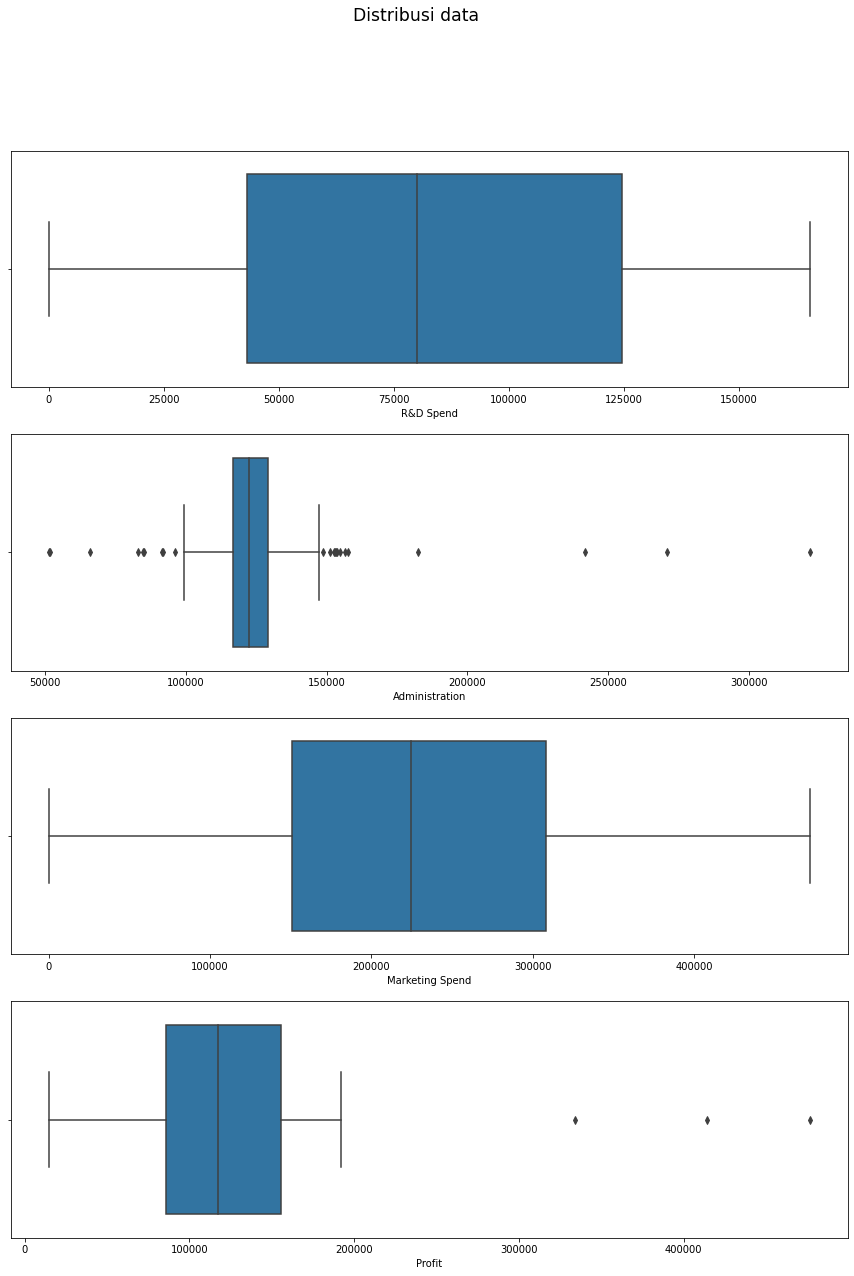

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Distribusi data', fontsize='xx-large')

sns.boxplot(x=df['R&D Spend'], ax=axes[0])
axes[0].set_xlabel('R&D Spend')

sns.boxplot(x=df['Administration'], ax=axes[1])
axes[1].set_xlabel('Administration')

sns.boxplot(x=df['Marketing Spend'], ax=axes[2])
axes[2].set_xlabel('Marketing Spend')

sns.boxplot(x=df['Profit'], ax=axes[3])
axes[3].set_xlabel('Profit')

plt.show()

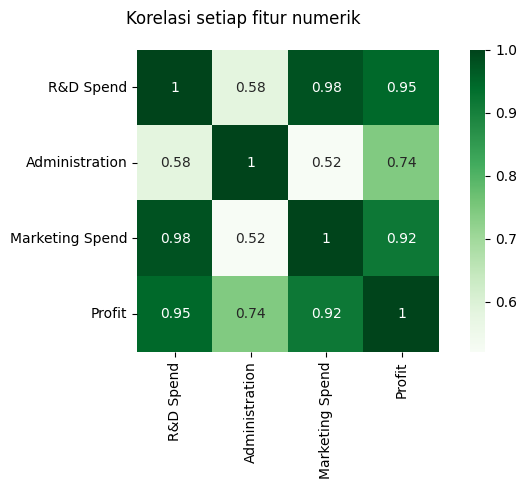

In [ ]:
fig = plt.figure(figsize=(8,4),dpi=100)
fig.suptitle("Korelasi setiap fitur numerik")
corrmat = df.corr()
sns.heatmap(data=corrmat,annot=True, cmap="Greens",square=True)
plt.show()

##Mencoba cleaning pake IQR

In [ ]:
df_temp = df.copy()
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

R&D Spend           81481.000000
Administration      12498.433150
Marketing Spend    157220.223925
Profit              69633.908882
dtype: float64


In [ ]:
df_clean = df_temp.copy()
no = 0
for col in df_clean.columns:
  df_clean = df_clean[df_clean[col] > (Q1[no] - 1.5 * IQR[no])]
  df_clean = df_clean[df_clean[col] < (Q3[no] + 1.5 * IQR[no])]
  no += 1

In [ ]:
df_temp.shape

(1000, 4)

In [ ]:
df_clean.shape

(978, 4)

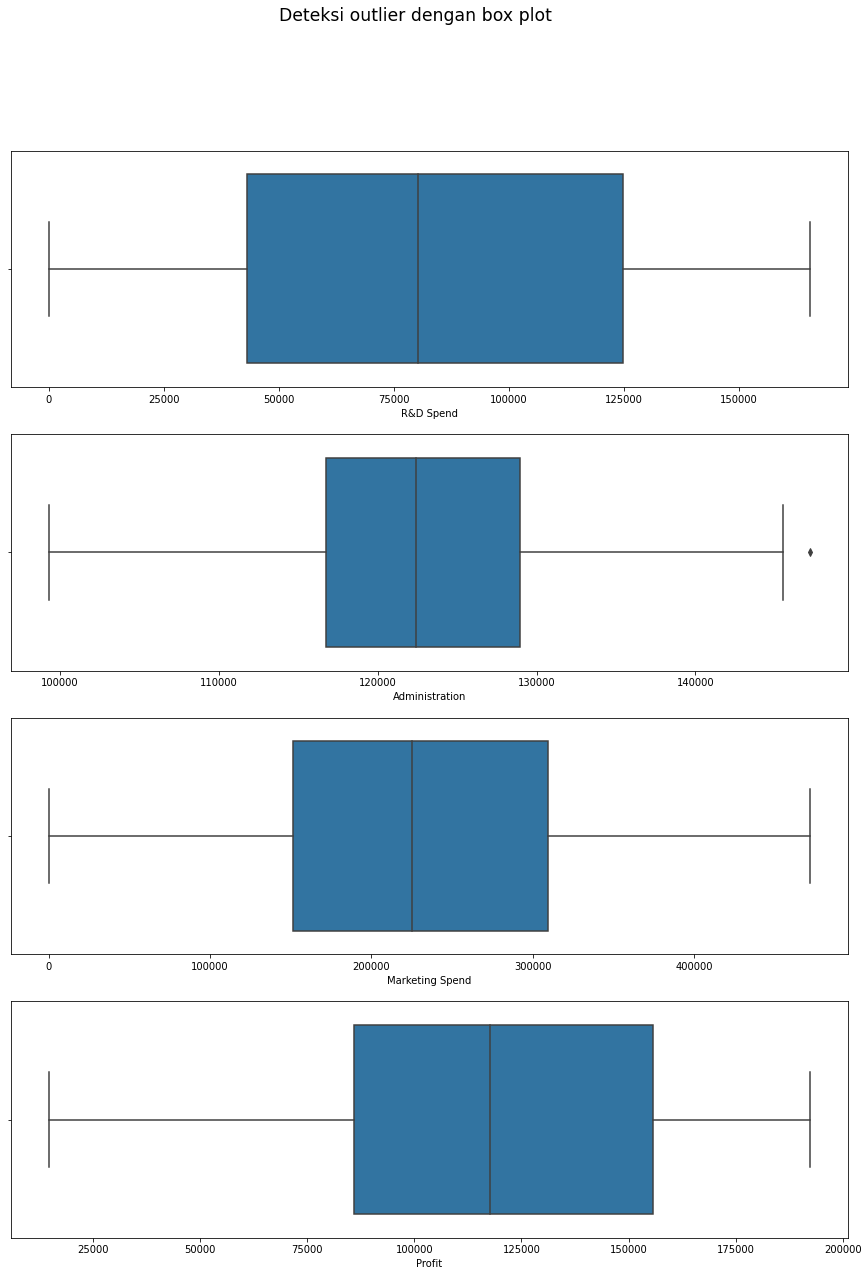

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Deteksi outlier dengan box plot', fontsize='xx-large')

sns.boxplot(x=df_clean['R&D Spend'], ax=axes[0])
axes[0].set_xlabel('R&D Spend')

sns.boxplot(x=df_clean['Administration'], ax=axes[1])
axes[1].set_xlabel('Administration')

sns.boxplot(x=df_clean['Marketing Spend'], ax=axes[2])
axes[2].set_xlabel('Marketing Spend')

sns.boxplot(x=df_clean['Profit'], ax=axes[3])
axes[3].set_xlabel('Profit')

plt.show()

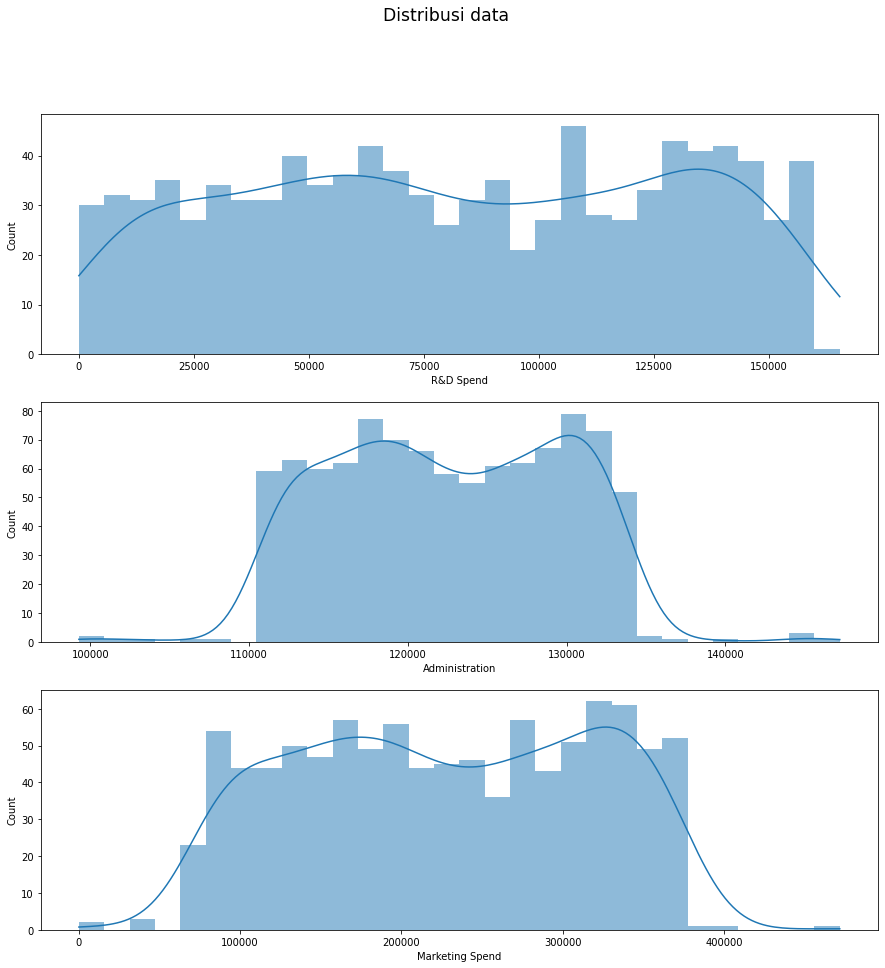

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Distribusi data', fontsize='xx-large')

sns.histplot(df_clean['R&D Spend'], bins=30, ax=axes[0], kde=True, linewidth=0)
axes[0].set_xlabel('R&D Spend')

sns.histplot(df_clean['Administration'], bins=30, ax=axes[1], kde=True, linewidth=0)
axes[1].set_xlabel('Administration')

sns.histplot(df_clean['Marketing Spend'], bins=30, ax=axes[2], kde=True, linewidth=0)
axes[2].set_xlabel('Marketing Spend')

plt.show()

## Data Normalization

MinMax Normalization

In [ ]:
df_min_max = df_clean.copy()
  
# minmax normalization 
for column in df_min_max.columns:
    df_min_max[column] = (df_min_max[column] - df_min_max[column].min()) / (df_min_max[column].max() - df_min_max[column].min())    
  
print(df_min_max)

     R&D Spend  Administration  Marketing Spend    Profit
0     1.000000        0.785025         1.000000  1.000000
2     0.927985        0.038905         0.864664  0.993178
3     0.873136        0.404664         0.812235  0.947292
5     0.797566        0.011131         0.769126  0.801382
6     0.814128        1.000000         0.270710  0.796490
..         ...             ...              ...       ...
992   0.635788        0.557236         0.575733  0.699179
993   0.283025        0.377463         0.337179  0.418574
994   0.587901        0.532833         0.543350  0.661088
995   0.327398        0.400076         0.367186  0.453871
996   0.816272        0.649214         0.697785  0.842746

[978 rows x 4 columns]


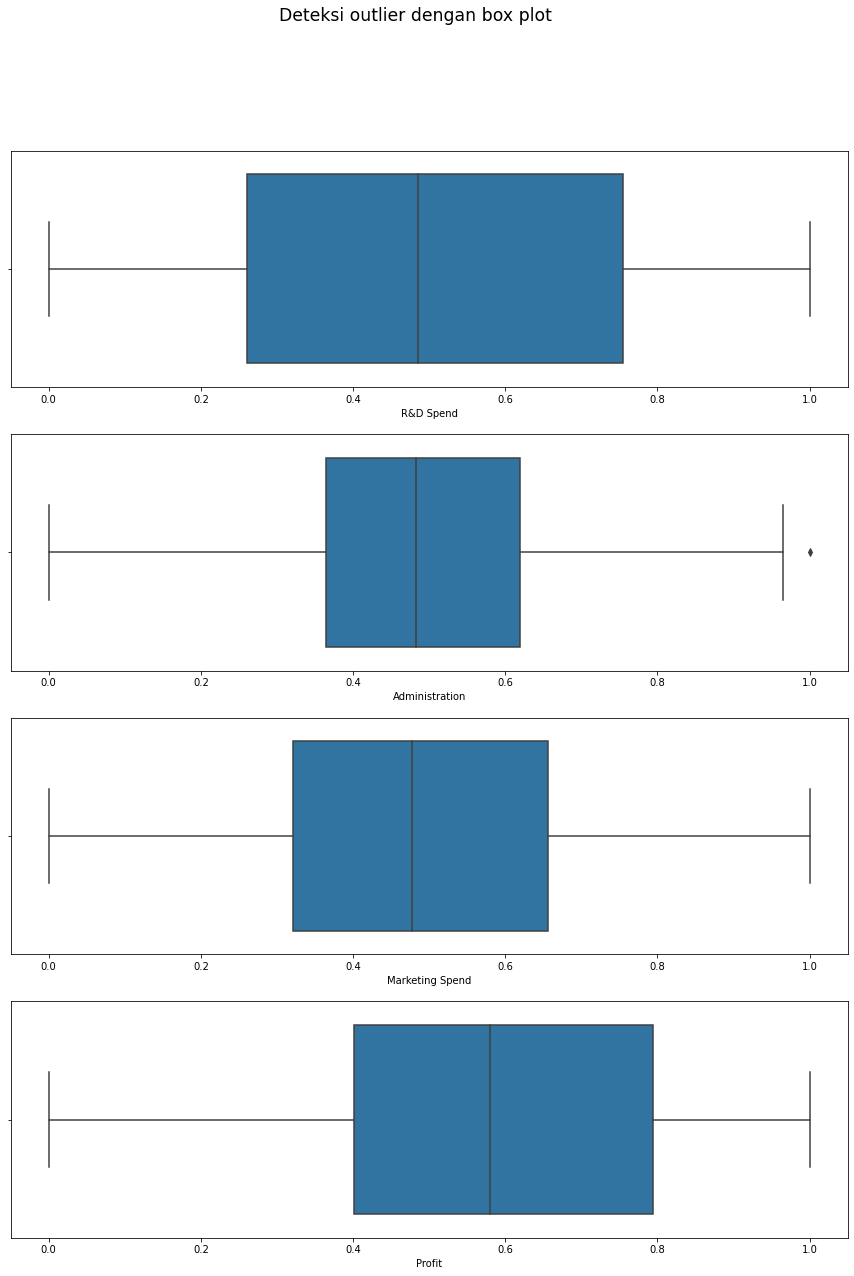

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Normalized data distribution', fontsize='xx-large')

sns.boxplot(x=df_min_max['R&D Spend'], ax=axes[0])
axes[0].set_xlabel('R&D Spend')

sns.boxplot(x=df_min_max['Administration'], ax=axes[1])
axes[1].set_xlabel('Administration')

sns.boxplot(x=df_min_max['Marketing Spend'], ax=axes[2])
axes[2].set_xlabel('Marketing Spend')

sns.boxplot(x=df_min_max['Profit'], ax=axes[3])
axes[3].set_xlabel('Profit')

plt.show()

## Export Cleaned Data

In [ ]:
from google.colab import files

df_min_max.to_csv('1000_companies_cleaned.csv') 
files.download('1000_companies_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>